In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np

In [10]:
df_salary = pd.read_csv('data_salary.csv', index_col='Год')
df_salary = df_salary.rename(columns={'Здравоохранение и предоставление социальных услуг': 'Социальная сфера'})
df_salary['ВВП'] = df_salary['ВВП'] * 1000000

In [11]:
# Расчет индекса потребительских цен относительно 2000 года
df_salary["ИПЦ"] = 100 + df_salary['Инфляция'].shift(1)
df_salary["ИПЦ"][[2000]] = 100
cpi_array = df_salary["ИПЦ"].to_numpy()
cpi_base = cpi_array[0]
cpi_values = []
for i in range(len(cpi_array)):
    cpi_2000_price = cpi_base*np.prod(cpi_array[1:i+1])/100**(i)
    cpi_values.append(cpi_2000_price)
df_salary['ИПЦ баз'] = cpi_values

Анализ зарплат в России

In [12]:
# Поправка на инфляцию
# Зарплата в ценах 2000 года
for column in df_salary.columns:
   if column not in ('Инфляция', 'ВВП', 'Родившиеся', 'USD/RUB'):
    name = f'{column} с учетом инфл.'
    name_s = f'ИНЗ {column}'
    name_r = f'ИPЗ {column}'
    df_salary[name_s] = df_salary[column] * 100 / df_salary[column][2000]
    df_salary[name_r] = df_salary[name_s] / df_salary['ИПЦ баз']
    df_salary[name] = df_salary[column][2000]*df_salary[name_r]
df_salary

,Всего по экономике,Строительство,Образование,Социальная сфера,Инфляция,ВВП,Родившиеся,USD/RUB,ИПЦ,ИПЦ баз,...,Образование с учетом инфл.,ИНЗ Социальная сфера,ИPЗ Социальная сфера,Социальная сфера с учетом инфл.,ИНЗ ИПЦ,ИPЗ ИПЦ,ИПЦ с учетом инфл.,ИНЗ ИПЦ баз,ИPЗ ИПЦ баз,ИПЦ баз с учетом инфл.
Год,,,,,,,,,,,,,,,,,,,,,
2000,2223.4,2639.8,1240.2,1333.3,20.20,7.305600e+09,1266800.0,28.12,100.00,100.000000,...,1240.200000,100.000000,1.000000,1333.300000,100.00,1.000000,100.000000,100.000000,1.0,100.0
2001,3240.4,3859.3,1833.0,1959.9,18.58,8.943600e+09,1311604.0,29.17,120.20,120.200000,...,1524.958403,146.996175,1.222930,1630.532446,120.20,1.000000,100.000000,120.200000,1.0,100.0
2002,4360.3,4806.9,2927.3,3141.3,15.06,1.083050e+10,1396967.0,31.35,118.58,142.533160,...,2053.767699,235.603390,1.652972,2203.908199,118.58,0.831947,83.194676,142.533160,1.0,100.0
2003,5498.5,6176.7,3386.6,3662.6,11.99,1.320820e+10,1477301.0,30.69,115.06,163.998654,...,2065.016950,274.701868,1.675025,2233.311014,115.06,0.701591,70.159112,163.998654,1.0,100.0
2004,6739.5,7304.7,4203.4,4612.0,11.74,1.702720e+10,1502477.0,28.82,111.99,183.662092,...,2288.659539,345.908648,1.883397,2511.133319,111.99,0.609761,60.976110,183.662092,1.0,100.0
2005,8554.9,9042.8,5429.7,5905.6,10.91,2.160980e+10,1457376.0,28.29,111.74,205.224022,...,2645.742902,442.931073,2.158281,2877.635833,111.74,0.544478,54.447817,205.224022,1.0,100.0
2006,10633.9,10869.2,6983.3,8059.9,9.00,2.691720e+10,1479637.0,27.19,110.91,227.613963,...,3068.045523,604.507613,2.655846,3541.039352,110.91,0.487272,48.727239,227.613963,1.0,100.0
2007,13593.4,14333.4,8778.3,10036.6,11.87,3.324750e+10,1610122.0,25.58,109.00,248.099220,...,3538.221528,752.763819,3.034124,4045.397650,109.00,0.439340,43.934036,248.099220,1.0,100.0
2008,17290.1,18574.0,11316.8,13048.6,13.28,4.127680e+10,1713947.0,24.86,111.87,277.548597,...,4077.412072,978.669467,3.526119,4701.374873,111.87,0.403065,40.306455,277.548597,1.0,100.0


In [20]:
df_salary['Всего по  экономике с учетом инфл.']

Год
2000    2223.400000
2001    2695.840266
2002    3059.147780
2003    3352.771422
2004    3669.510626
2005    4168.566579
2006    4671.901434
2007    5479.017636
2008    6229.575716
2009    5927.825079
2010    6125.033367
2011    6280.202087
2012    6744.777326
2013    7080.082739
2014    7254.534480
2015    6822.220227
2016    6517.843556
2017    6599.233450
2018    7185.954650
2019    7544.658867
2020    7853.204677
2021    8345.801034
2022    8788.584731
2023    8858.612377
Name: Всего по  экономике с учетом инфл., dtype: float64

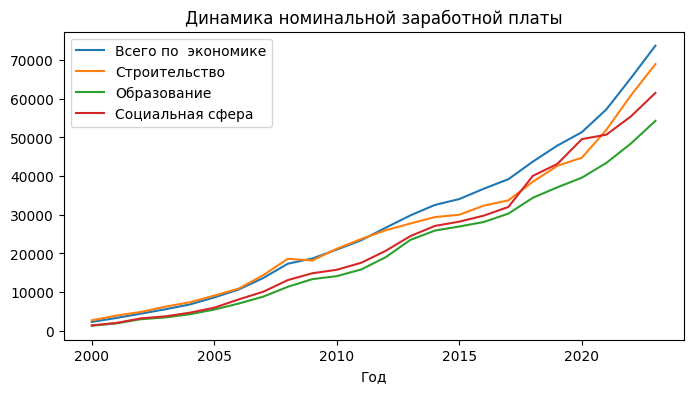

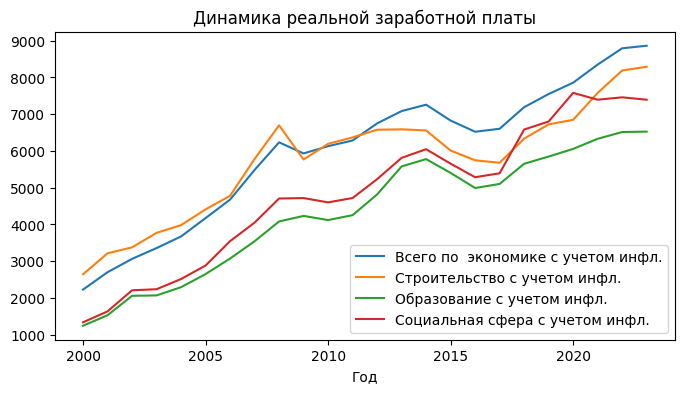

In [13]:
# Графики
col_without_infl = [col for col in df_salary.columns if ('инфл.' not in col) and (col not in ('Инфляция', 'ВВП', 'Родившиеся', 'USD/RUB')) and ('ИПЦ' not in col and 'ИНЗ' not in col and 'ИPЗ' not in col)]
df_salary[col_without_infl].plot(kind='line', figsize=(8, 4), title='Динамика номинальной заработной платы')
plt.show()

col_infl = [col for col in df_salary.columns if 'инфл.' in col and "ИПЦ" not in col]
df_salary[col_infl].plot(kind='line', figsize=(8, 4), title='Динамика реальной заработной платы')
plt.show()

На графиках виден рост номинальной и реальной заработной платы работников как по экономике в целом, так и по отдельным отраслям

In [14]:
sector = ['Всего по  экономике', 'Строительство', 'Образование',
       'Социальная сфера']

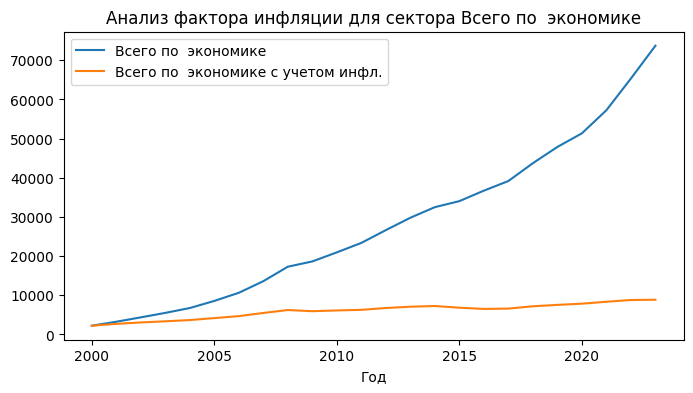

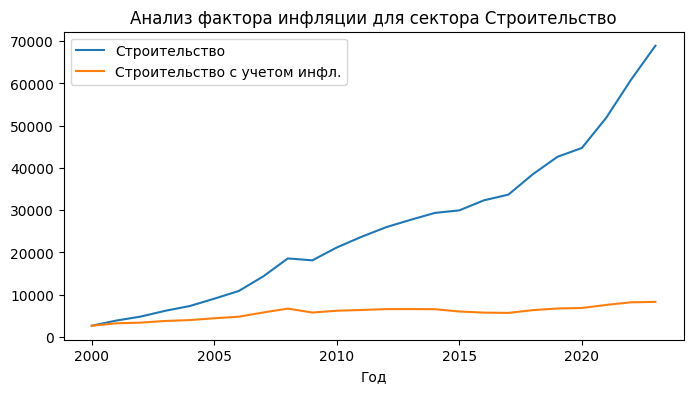

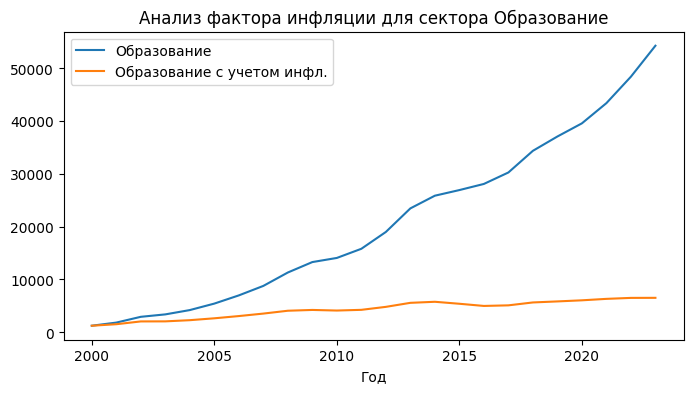

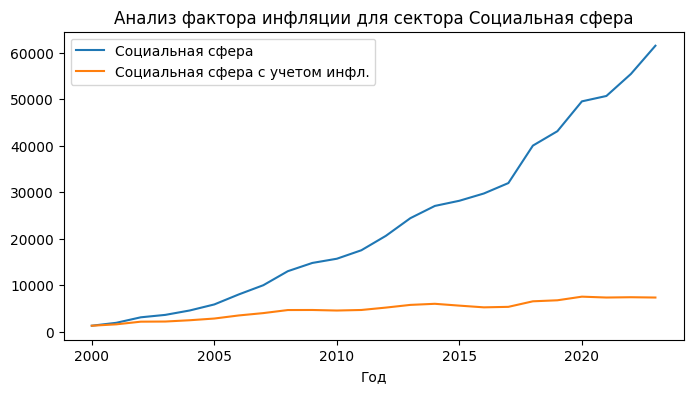

In [21]:
# Графики с учетом инфляции
# df_salary[status].plot(kind='line', figsize=(8, 4), title=status)
for status in sector:
    status_infl = status + ' с учетом инфл.'
    title = f'Aнализ фактора инфляции для сектора {status}'
    df_salary[[status, status_infl]].plot(kind='line', figsize=(8, 4), title=title)
    plt.show()

In [16]:
# Рост от года к году в %
for column in df_salary.columns:
   if column not in ('Инфляция', 'ВВП', 'Родившиеся', 'USD/RUB') and ('инфл' not in column) and ('ИПЦ' not in column and 'ИНЗ' not in column and 'ИPЗ' not in column):
    name = f'{column} с учетом инфл.'
    column_name_infl = f'Рост реальной зарплаты {column}'
    df_salary[column_name_infl] = df_salary[name].pct_change()*100

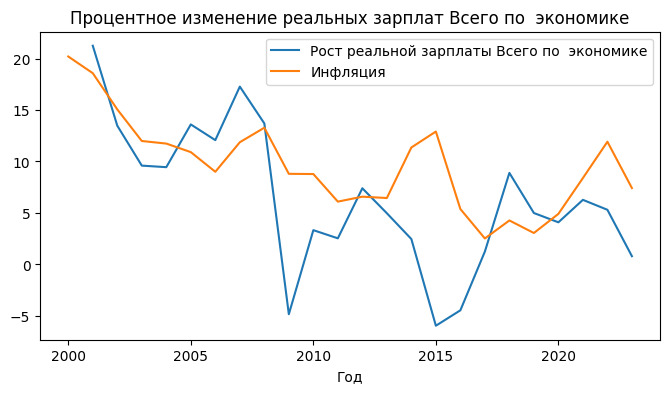

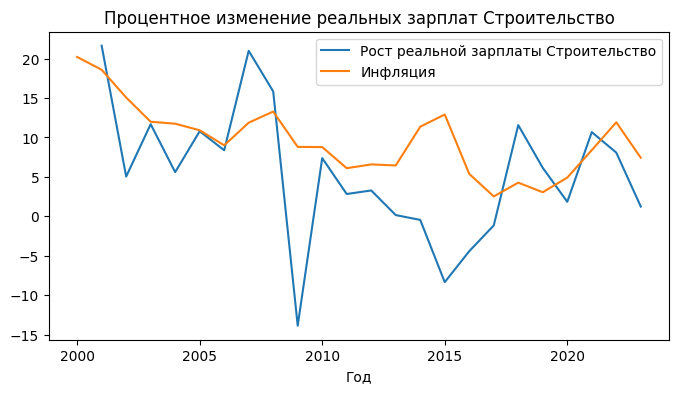

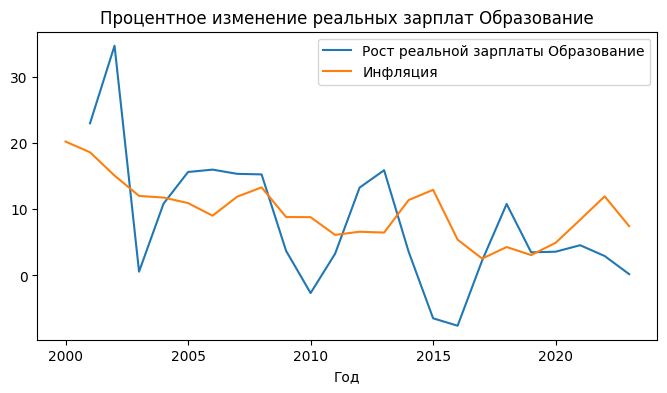

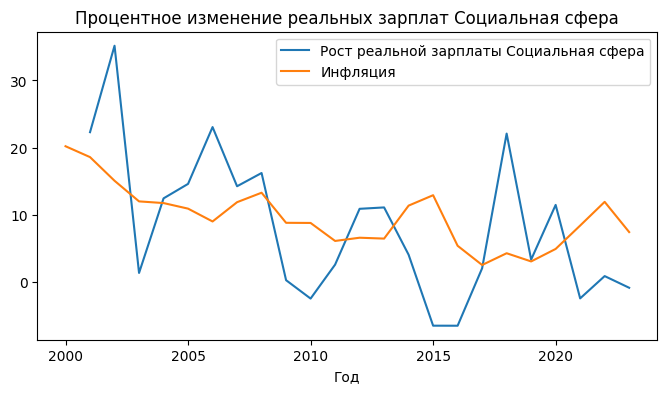

In [17]:
# График темпов роста
for status in sector:
    name = f'Рост реальной зарплаты {status}'
    title = f'Процентное изменение реальных зарплат {status}'
    df_salary[[name, 'Инфляция']].plot(kind='line', figsize=(8, 4), title=title)
    plt.show()

Несмотря на рост реальных зарплат, темпы роста снизились относительно 2000-х и не всегда оказываются выше уроня инфляции

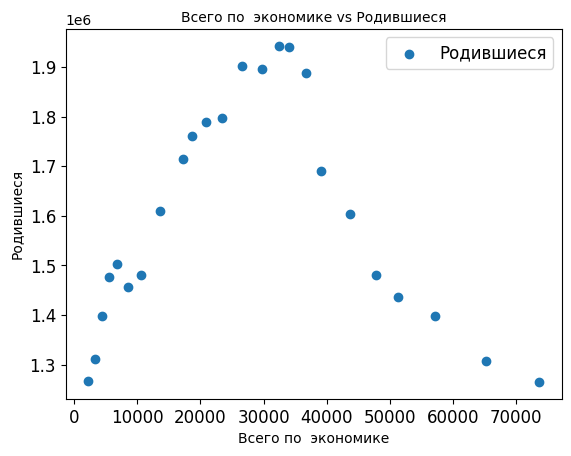

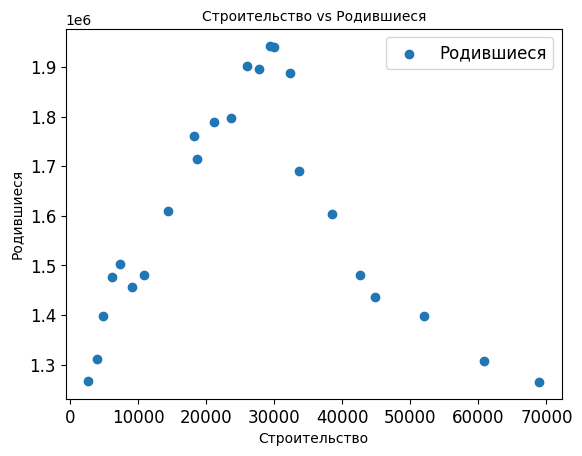

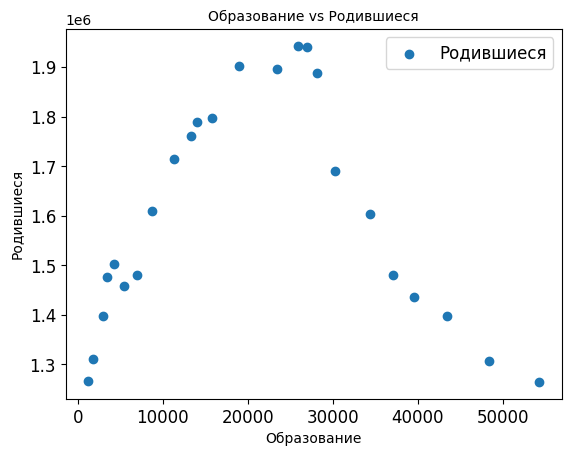

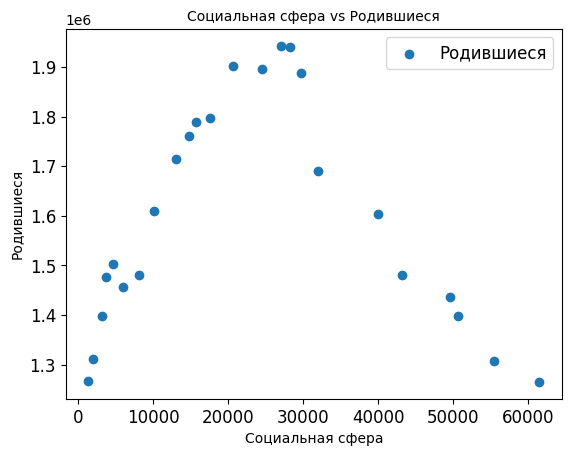

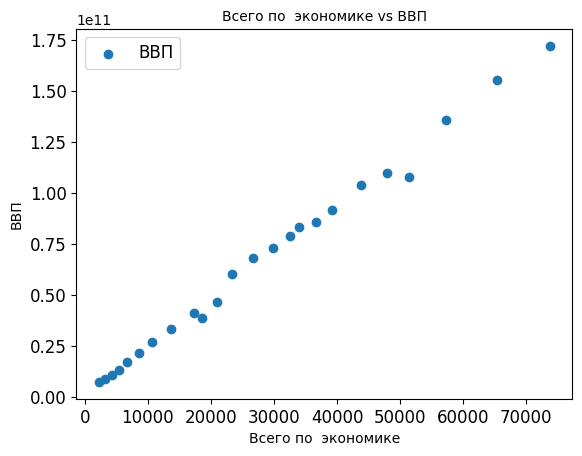

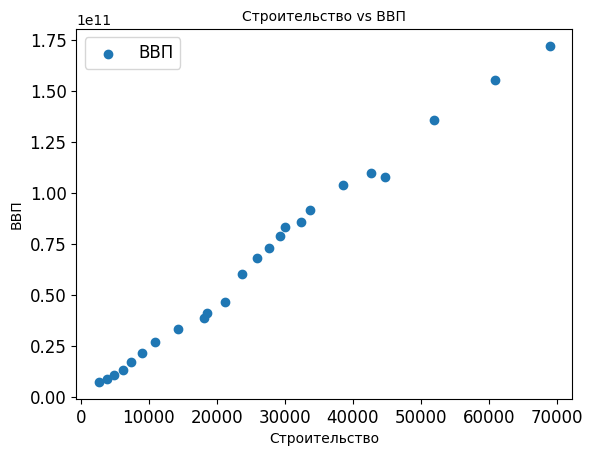

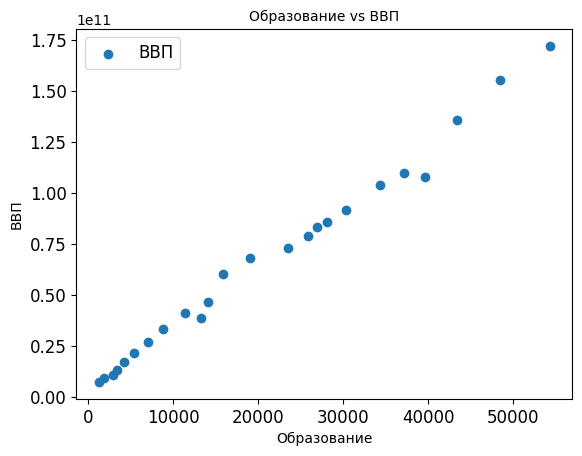

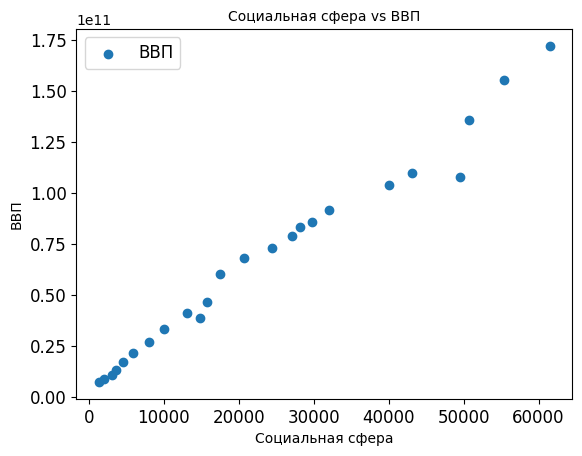

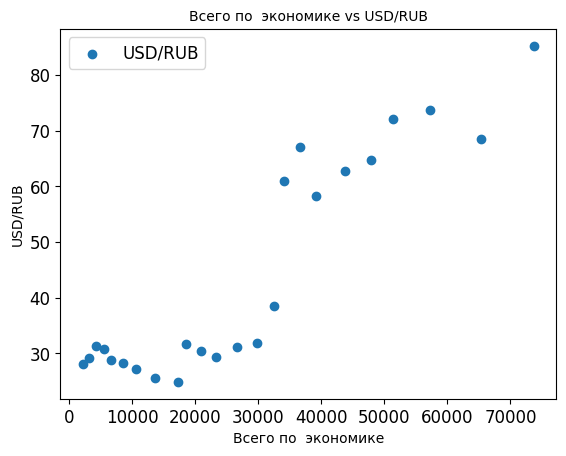

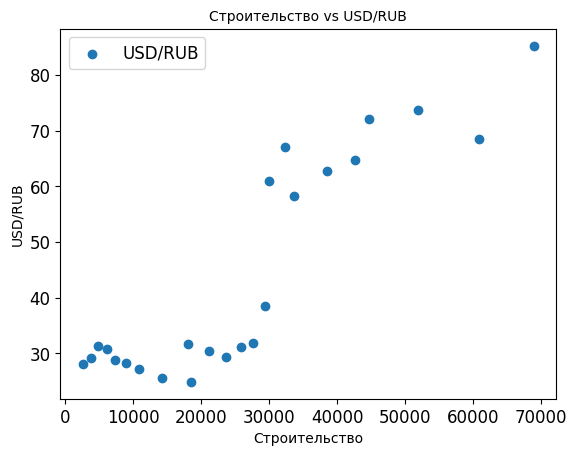

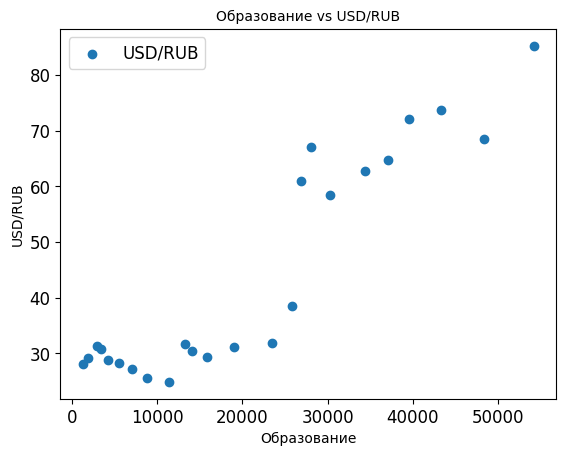

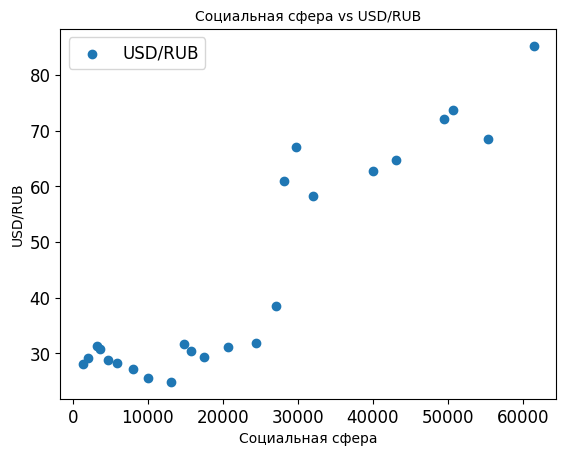

In [18]:
# Корреляция социальноэкономических покахателей с динамикой реальных зарплат
#Рассмотрим корреляцию социальноэкономических показателей с динамикой реальных зарплат
for status in sector:
    plt.scatter(status, 'Родившиеся',
                data=df_salary)
    plt.gca().set(xlabel=status, ylabel='Родившиеся')

    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    title = f'{status} vs Родившиеся'
    plt.title(title, fontsize=10)
    plt.legend(fontsize=12)
    plt.show()

for status in sector:
    plt.scatter(status, 'ВВП',
                data=df_salary)
    plt.gca().set(xlabel=status, ylabel='ВВП')

    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    title = f'{status} vs ВВП'
    plt.title(title, fontsize=10)
    plt.legend(fontsize=12)
    plt.show()

for status in sector:
    plt.scatter(status, 'USD/RUB',
                data=df_salary)
    plt.gca().set(xlabel=status, ylabel='USD/RUB')

    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    title = f'{status} vs USD/RUB'
    plt.title(title, fontsize=10)
    plt.legend(fontsize=12)
    plt.show()

Можно заметить сильную положительную линейную зависимость реальных зарплат с ВВП, также существует положительная зависимость зарплат и среднего курса доллара к рублю. До определенного уровня зарплат наблюдается рост количества родившихся, но затем следует снижение, стоит учитывать влияние большого количества иных факторов на демографические показатели

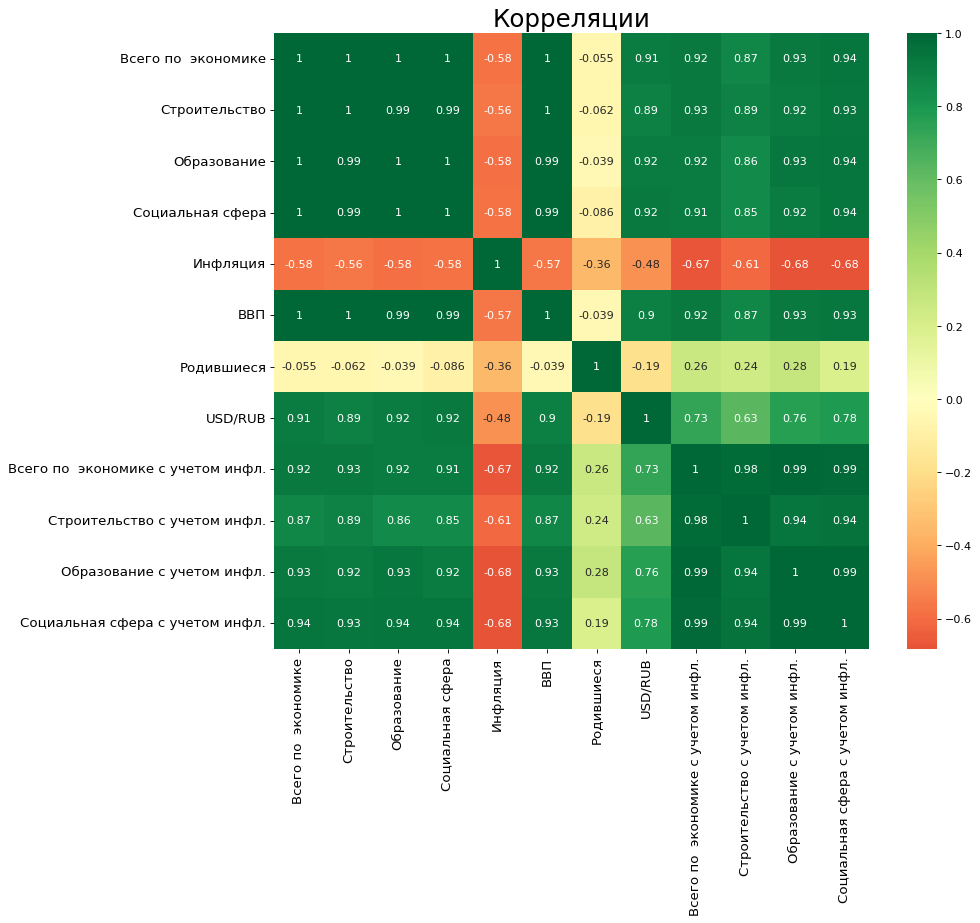

In [19]:
# Тепловая карта
plt.figure(figsize=(12,10), dpi= 80)
col = [col for col in df_salary.columns if ('Рост' not in col) and ('ИПЦ' not in col and 'ИНЗ' not in col and 'ИPЗ' not in col)]
sns.heatmap(df_salary[col].corr(), xticklabels=df_salary[col].corr().columns, yticklabels=df_salary[col].corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()